In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

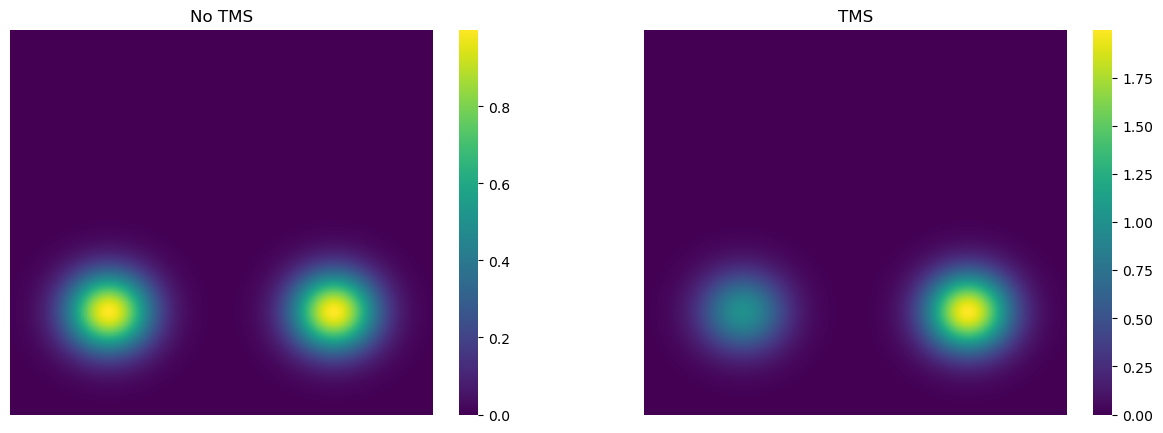

In [18]:
screen_min = -15
screen_max = 15
res = 1000
x = np.linspace(screen_min, screen_max, res)
y = np.linspace(screen_min, screen_max, res)
X, Y = np.meshgrid(x, y)
Z_notms = np.zeros((res, res))
Z_tms = np.zeros((res, res))

inphosph_center_x = -8
inphosph_center_y = 7
inphosph_radius = 3

outphosph_center_x = 8
outphosph_center_y = 7
phosph_radius = 3

# Create a figure with two bumps of equal height and width for inphosph and outphosph
for i in range(res):
    for j in range(res):
        Z_notms[i, j] = np.exp(-((X[i, j] - inphosph_center_x) ** 2 + (Y[i, j] - inphosph_center_y) ** 2) / inphosph_radius ** 2) + np.exp(-((X[i, j] - outphosph_center_x) ** 2 + (Y[i, j] - outphosph_center_y) ** 2) / phosph_radius ** 2)

# Create a figure for tms with inphosphene having a bigger bump than outphosphene
for i in range(res):
    for j in range(res):
        Z_tms[i, j] = np.exp(-((X[i, j] - inphosph_center_x) ** 2 + (Y[i, j] - inphosph_center_y) ** 2) / inphosph_radius ** 2) + 2 * np.exp(-((X[i, j] - outphosph_center_x) ** 2 + (Y[i, j] - outphosph_center_y) ** 2) / phosph_radius ** 2)

f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(Z_notms, ax=ax[0], cmap='viridis')
ax[0].set_title('No TMS')
ax[0].axis('off')
sns.heatmap(Z_tms, ax=ax[1], cmap='viridis')
ax[1].set_title('TMS')
ax[1].axis('off')
plt.show()

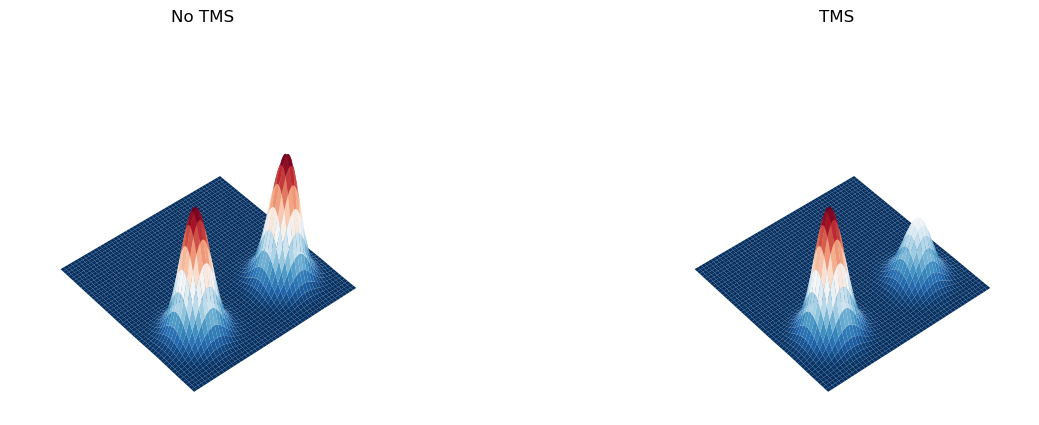

In [28]:
# Plot the same as figure above but in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z_notms, cmap='RdBu_r')
ax.set_title('No TMS')
ax.axis('off')
ax.view_init(elev=45, azim=50)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z_tms, cmap='RdBu_r')
ax.set_title('TMS')
ax.axis('off')
ax.view_init(elev=45, azim=50)
plt.show()